In [1]:
# ----------------------------------------------------------------------------------------------------
# 라이브러리 목록

# 기본 라이브러리 
import pandas as pd

# 시각화 라이브러리 
import matplotlib
import matplotlib.pyplot as plt

# 로그 라이브러리 
import logging

# 개인 라이브러리 
from preparation_for_analysis.show_window import DataVisualizer
from preparation_for_analysis.model_1 import LinearRegression

# pandas 설정
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력

# matplotlib 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용하는 한글 폰트
matplotlib.rcParams['axes.unicode_minus'] = False  # 음수 기호 문제 해결

# 로깅 설정정
# 로깅 수준을 WARNING으로 설정하여 디버그 메시지 숨기기
logging.getLogger('matplotlib').setLevel(logging.WARNING)

# preparation_for_analysis 설정
visualizer = DataVisualizer(line="=", length=100, start="#")
# ----------------------------------------------------------------------------------------------------

In [3]:
# ----------------------------------------------------------------------------------------------------
# new_learning_encoding 불러오기 
new_learning_encoding = pd.read_csv(
    "C:\\Users\\ssalt\\Documents\\ev_price_predict_project\\data\\train\\A_df\\c_learning\\3_new_learning_encoding.csv",
    sep=",",
    header=0
    )

new_learning_encoding = new_learning_encoding.astype("float32")
visualizer.show_df_info(title="new_learning_encoding", df=new_learning_encoding)
# ----------------------------------------------------------------------------------------------------



# Title: new_learning_encoding


# DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6372 entries, 0 to 6371
Columns: 168 entries, cc0 to Price
dtypes: float32(168)
memory usage: 4.1 MB







In [4]:
# ----------------------------------------------------------------------------------------------------
# model_1 불러오기 
model_1 = LinearRegression(input_dim=167, output_dim=1, 
                           continue_logging=True, initalize_weights=False)
  
model_1.load_model()
# ----------------------------------------------------------------------------------------------------

Model loaded from C:\Users\ssalt\Documents\ev_price_predict_project\data\train\B_models\a_model_1\best_model.pth.


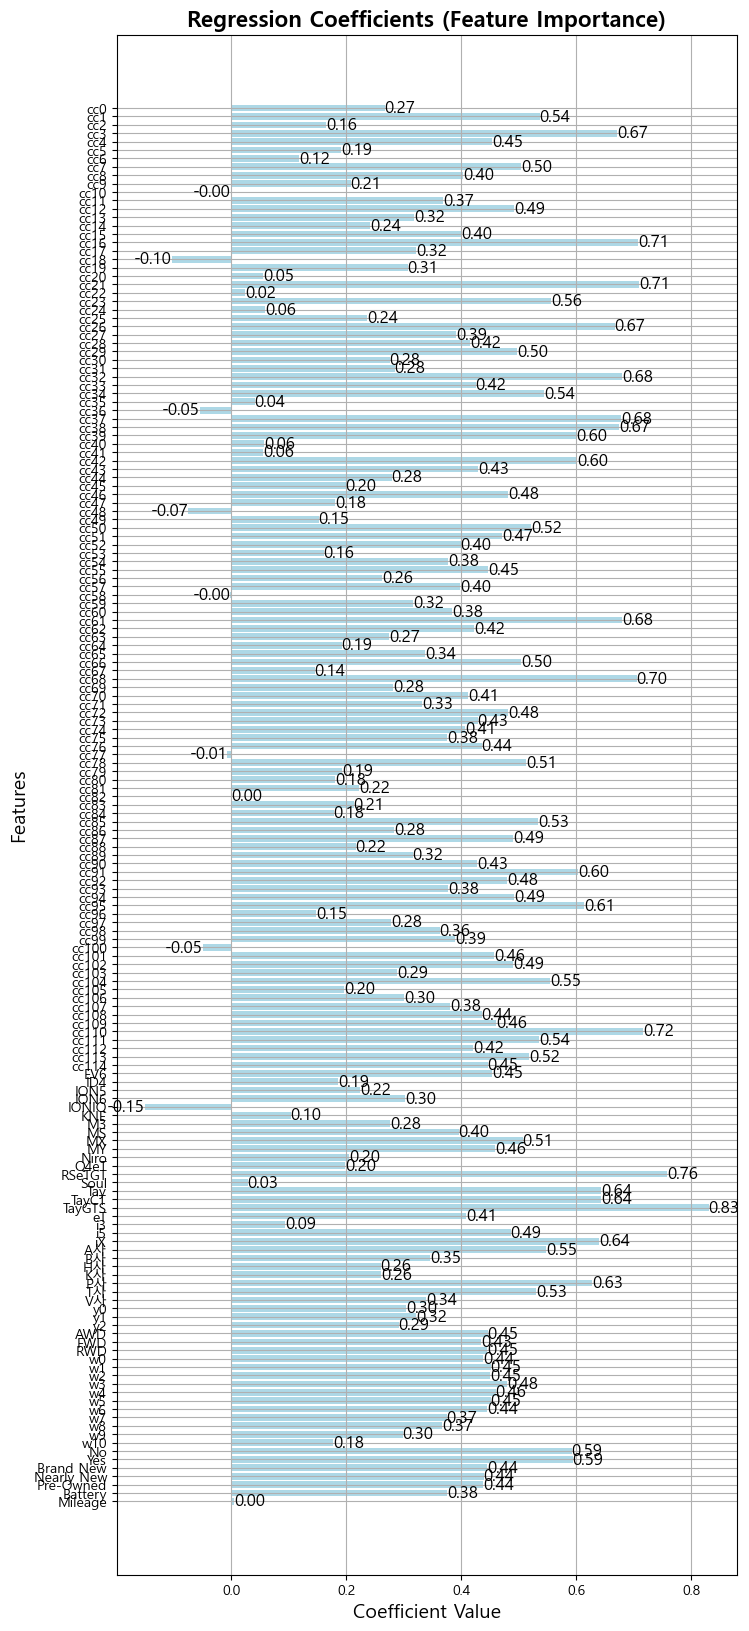

In [5]:
# ----------------------------------------------------------------------------------------------------
# 선형 회귀 계수 시각화 
# 수평 막대 그래프로 시각화 

# 데이터 준비
model_state_dict = {}
for name, param in model_1.model.named_parameters():
    model_state_dict[name] = param

coefficients = model_state_dict["0.weight"].cpu().detach().numpy().tolist()[0]
bias = model_state_dict["0.bias"].cpu().detach().numpy()[0]
variables = new_learning_encoding.columns[:-1]

# 순서를 바꿔서 맨 앞의 회귀 계수가 맨 위로 오도록 설정
coefficients_sorted = coefficients[::-1] 
variables_sorted = variables[::-1]

# 회귀 계수를 시각화 (막대 그래프)
plt.figure(figsize=(8, 20))
bars = plt.barh(variables_sorted, coefficients_sorted, color='lightblue')
plt.title("Regression Coefficients (Feature Importance)", fontsize=16, fontweight='bold')
plt.xlabel("Coefficient Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(True)

# 각 막대 옆에 회귀 계수 값 추가
for bar in bars:
    # 음수 값에 대한 처리: 막대가 왼쪽으로 가는 경우
    if bar.get_width() < 0:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                 f'{bar.get_width():.2f}', ha='right', va='center', fontsize=12, color='black')
    else:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
                 f'{bar.get_width():.2f}', ha='left', va='center', fontsize=12, color='black')


plt.show()
# ----------------------------------------------------------------------------------------------------
